<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/Avaliacao_multi_classe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação com Árvores de Decisão**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$

## **Classificação do conjunto Íris**

* Dataset da flor Íris, introduzido pelo estatistico e biologo Ronald Fisher.
* Dados descrevem características da flor íris de três espécies relacionadas (setosa, versicolo e virginica).
* [Iris Data Set](http://archive.ics.uci.edu/ml/datasets/Iris)


**Montando ambiente no Google Drive**

## 1. Importar bibliotecas necessárias

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## 2. Lendo dados

In [ ]:
iris = datasets.load_iris()

# Transformando os dados em um dataframe do Pandas
dados = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 3. Limpeza e organização dos dados

Nesse caso específico não precisamos nos preocupar com a limpeza dos dados. Mas vocês **NUNCA** devem esquecer dessa etapa.

## 4. Re-escala dos dados

### Re-escala usando máximo e mínimo

Vamos testar sem realizar a re-escala.

In [ ]:
#dados = (dados - dados.min())/(dados.max()-dados.min())

## 5. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:-1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = dados.target
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

### Dividir os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
* test_size: tamanho do subconjunto de teste (em percentual)
* random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
87,6.3,2.3,4.4,1.3
71,6.1,2.8,4.0,1.3
72,6.3,2.5,4.9,1.5
107,7.3,2.9,6.3,1.8


In [ ]:
y_train.head()

20     0.0
87     1.0
71     1.0
72     1.0
107    2.0
Name: target, dtype: float64

## 5. Definindo algoritmo de aprendizado

* Árvore de decisão
* criterion: medida de qualidade das separações ('gini','entropia')
  * gini: impureza de Gini
  * entropy: ganho de informação
* max_depth: profundidade máxima da árvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [ ]:
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

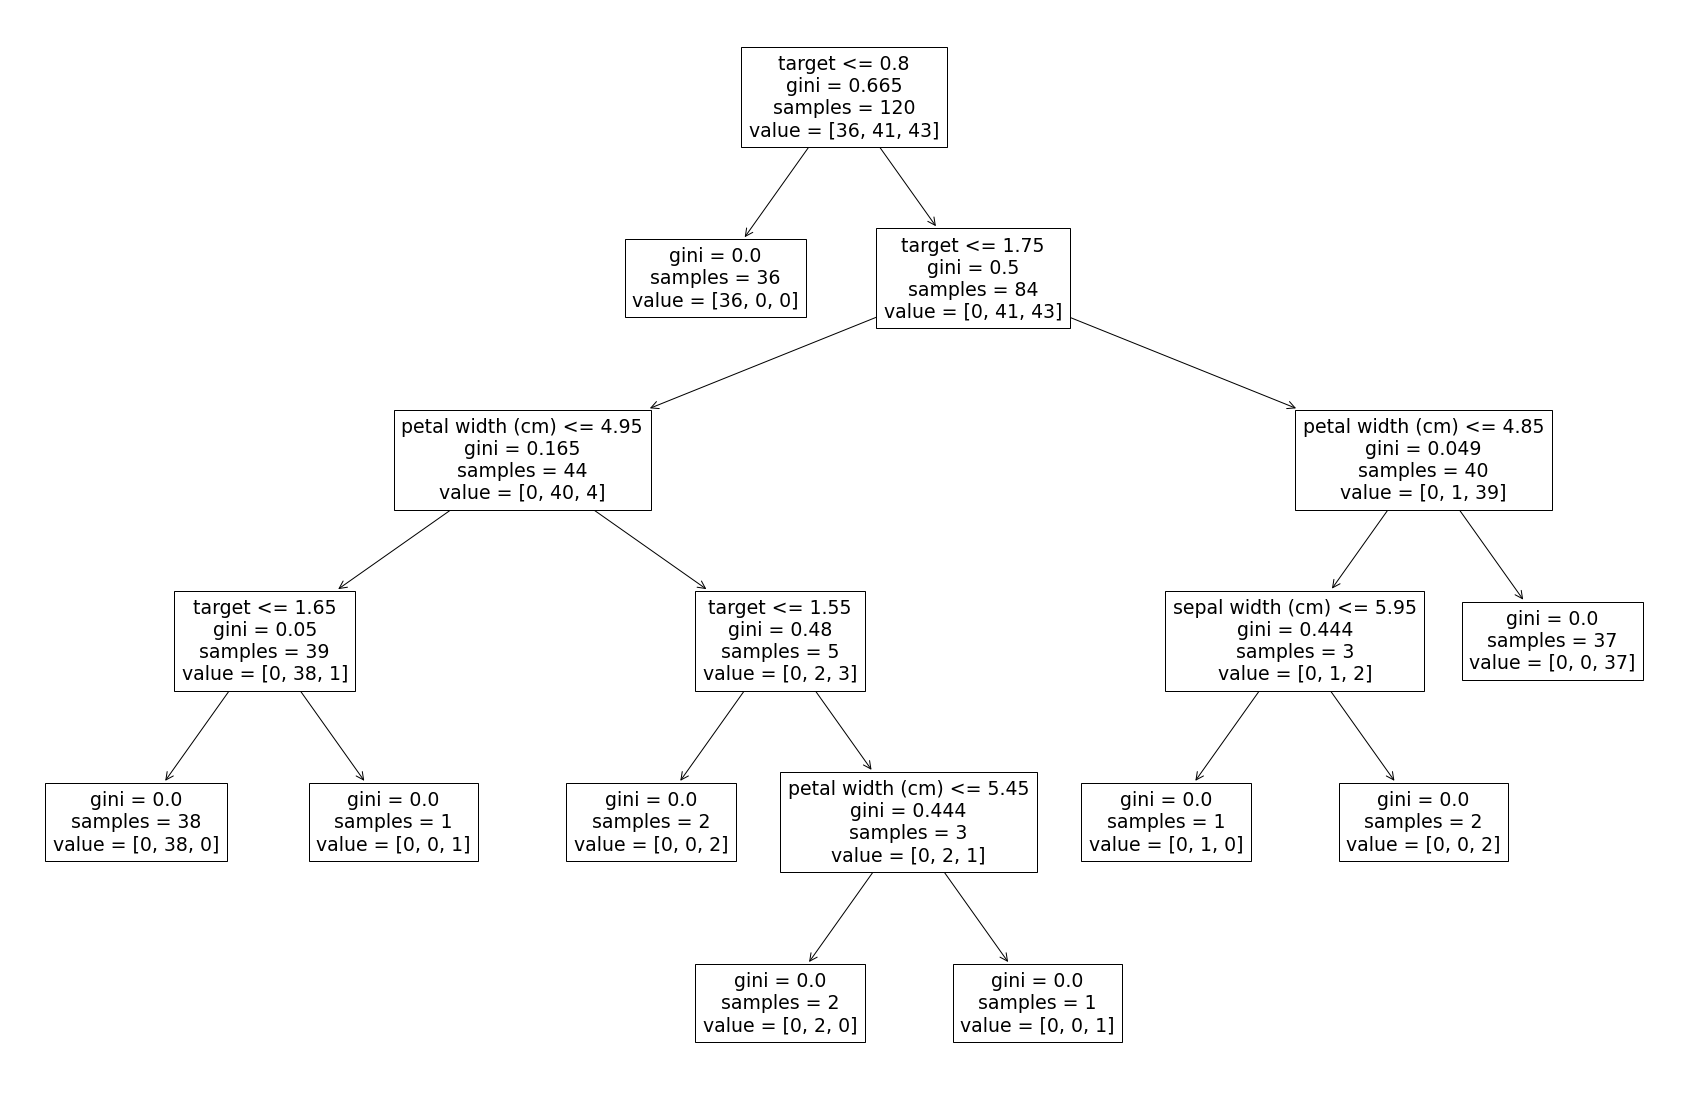

In [ ]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [ ]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 2., 2., 1., 2., 0., 0., 2., 2., 0., 0., 0., 0., 0., 2., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 2., 1., 0., 1.])

In [ ]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0.0 	 0.0
0.0 	 0.0
2.0 	 2.0
2.0 	 2.0
1.0 	 1.0
2.0 	 2.0
0.0 	 0.0
0.0 	 0.0
2.0 	 2.0
2.0 	 2.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
2.0 	 2.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
2.0 	 2.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0


## 6. Avaliação do classificador

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
# plt.hist(classificacao, bins = 3)
# plt.show()

(unique, counts) = np.unique(classificacao, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[ 0., 14.],
       [ 1.,  9.],
       [ 2.,  7.]])

No caso da matriz de confusão para problemas multi-classe é calculada uma matriz para cada classe da seguinte forma:

<table border="2">
    <tr>
        <td>TN</td>
        <td>FN</td>
    </tr>
    <tr>
        <td>FP</td>
        <td>TP</td>
    </tr>
</table>

In [ ]:
multilabel_confusion_matrix(y_test, classificacao)

array([[[16,  0],
        [ 0, 14]],

       [[21,  0],
        [ 0,  9]],

       [[23,  0],
        [ 0,  7]]])

In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test,classificacao)
acuracia

1.0

Para calcular a precisão de um problema com multi-classes

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

precisao = precision_score(y_test,classificacao, average='micro')
precisao

1.0

* Precisamos de métricas para saber quão bem nosso modelo se comportou
* No dataset temos três classes.
* Ideal é que o classificador classifique como positivo o que é positivo e negativo o que é negativo
* No entanto erros ocorrem na classificação
* Possibilidades de classificação:
  * tp (positivo verdadeiro): nódulo maligno classificado como maligno - acerto
  * tn (negativo verdadeiro): nódulo benigno classificado como benigno - acerto
  * fp (positivo falso): nódulo benigno classificado como maligno - erro
  * fn (negativo falso): nódulo maligno foi classificado como benigno - erro
* Exemplo:
  * 1 para maligno, 0 para benigno

<table>
  <tr><th>Real</th><th>Predito</th><th>Categoria</th></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>0</td><td>fn</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
</table>

* Resultado
  * acertos: $3 + 4 = 7$
  * erros: $1 + 2 = 3$
* Matriz de confusão

<table border="1">
    <tr>
        <th>Valores reais</th>
        <th colspan="2">Valores preditos</th>
    </tr>
    <tr>
        <td></td>
        <td>Maligno</td>
        <td>Benigno</td>
    </tr>
    <tr>
        <td>Maligno</td>
        <td>3 (tp)</td>
        <td>1 (fn)</td>
    </tr>
    <tr>
        <td>Benigno</td>
        <td>2 (fp)</td>
        <td>4 (tn)</td>
    </tr>
</table>

* Acurácia
  * taxa de acertos do classificador
  * indicação geral da performance do modelo
  * $acuracia = \dfrac{tp+tn}{tp+fp+tn+fn} = \dfrac{acertos}{total} = \dfrac{7}{10} = 0.7$
  * não é boa métrica quando dados muito desbalanceados
    * ex: fraudes no cartão de crédito

* Precisão
  * taxa de instâncias classificadas como positivas que são realmente positivas
  * $precision = \dfrac{tp}{tp+fp} = \dfrac{3}{5} = 0.6$
  * situações onde falsos positivos são mais prejudiciais
    * ex: classificar um investimento como boa oportunidade

* Recall
  * taxa de instâncias positivas classificadas corretamente
  * também chamaod de sentitividade ($sensitivity$)
  * $recall = \dfrac{tp}{tp+fn} = {3}{3+1} = 0.75$
  * situações onde falsos negativos são mais prejudiciais
    * ex: classificação de doenças

* F1-score
  * balanço entre precisão e recall (media harmônica)
  * forma de olhar apenas uma métrica ao invés de duas
  * $f$-$score = 2 * \dfrac{precision*recall}{precision+recall} = \dfrac{0.6 * 0.75}{0.6+0.75} = 0.67$
  * f1-score baixo indica que uma das duas métricas está baixa


In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.956140350877193

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test,classificacao)
precisao

0.9302325581395349

In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test,classificacao)
recall

0.9523809523809523

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test,classificacao)
f1

0.9411764705882352

### Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
  * $tpr = \dfrac{tp}{tp+fn} = \dfrac{positivos\_verdadeiros}{positivos\_totais}$ 
    * (recall)
  * $fpr = \dfrac{fp}{tn+fp} = \dfrac{positivos\_falsos}{negativos\_totais}$
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

<img src=https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png width=500>

In [ ]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [ ]:
fpr

array([0.        , 0.04166667, 1.        ])

In [ ]:
tpr

array([0.        , 0.95238095, 1.        ])

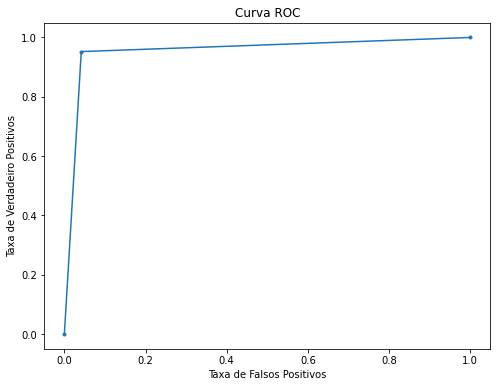

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*
* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [ ]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
erro = roc_auc_score(y_test,classificacao)
erro

0.9553571428571429

## Validação cruzada
* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste 
  * o treino foi usado para construir o modelo
  * o teste foi usado para avaliar o modelo
  * método holdout
* No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável
* Validação cruzada k-fold
  * dividir o conjunto de dados em $k$ subconjuntos (folds) disjuntos
  * um subconjunto é usado para teste
  * os outros k-1 subconjuntos são usados para criar o modelo
  * repete-se o procedimento k vezes, alternando o subconjunto de teste
  * calcula-se a acurácia média das k repetições e tem-se a avaliação do método


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width="500">

In [ ]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 35

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#define modelo
classificador = DecisionTreeClassifier()

In [ ]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.89473684, 0.89473684, 0.92982456, 0.87719298, 0.94736842,
       0.9122807 , 0.89473684, 0.94736842, 0.92982456, 0.94642857])

In [ ]:
scores.mean(),scores.std()

(0.9174498746867167, 0.024761366498720874)

## 7. Comparando Árvore de Decisão com Random Forest

## Método Holdout

In [ ]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.956140350877193

In [ ]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

1.0

In [ ]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [ ]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [ ]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [ ]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

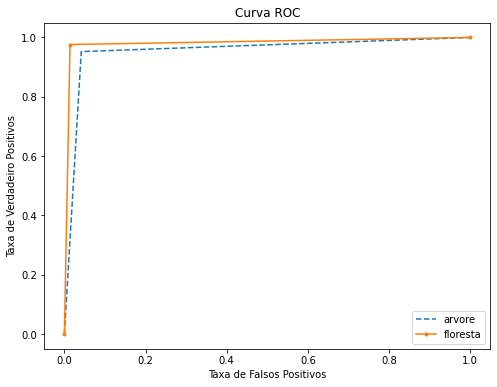

In [ ]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Validação Cruzada

In [ ]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.907, 0.024)

In [ ]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.965, 0.027)